In [1]:
%load_ext autoreload
%autoreload 2

from distvis.plots import compare_categorical_features, compare_numerical_features, marginal_dependency_plot

import pandas as pd
import plotly.io as pio
from plotly import express as px

We can use the following lines of codes and set **interactive_plots=False** to make static plots that can be showed on Github

In [20]:
interactive_plots = True
if interactive_plots is False:
    pio.renderers.default = "jpg"
else:
    pio.renderers.default = "plotly_mimetype+notebook"

# Load data and preprocess

In [3]:
data = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')

value_maps = {
    'stroke': {
        1: 'had stroke',
        0: "didn't have stroke"
    }
    ,
    'ever_married': {
        'Yes': 'ever married',
        'No': 'never married'
    }
}

for col, mapping in value_maps.items():
    data[col] = data[col].map(mapping)

In [4]:
numerical_feats = [
    'age',
    'avg_glucose_level', 
    'bmi'     
]

categorical_feats = [
    'gender',
    'hypertension', 
    'heart_disease', 
    'ever_married',
    'work_type', 
    'Residence_type',
    'smoking_status'
]

target = 'stroke'

# Compare numerical features
Partition by target

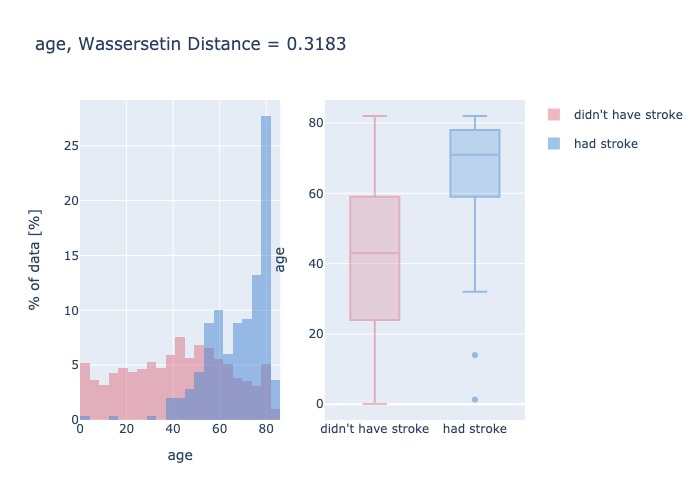

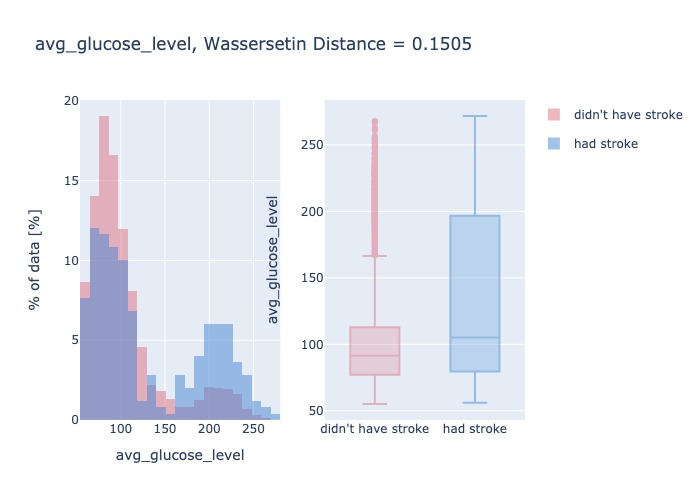

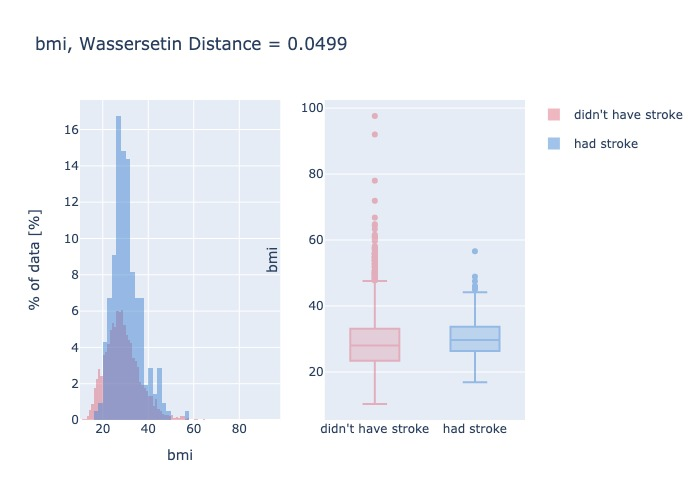

In [5]:
data_dict = {name: df for name, df  in data.groupby(target)}

fig_dict, distances = compare_numerical_features(
    data_dict=data_dict, features=numerical_feats, nbins=20, plot_cdf=False, plot_inv_cdf=False, plot_box=True
)
for feat, fig in fig_dict.items():
    fig.show()

In [6]:
round(distances, 2)

,distance
feature,
age,0.32
avg_glucose_level,0.15
bmi,0.05


# Compare categorical features
Partitio by target

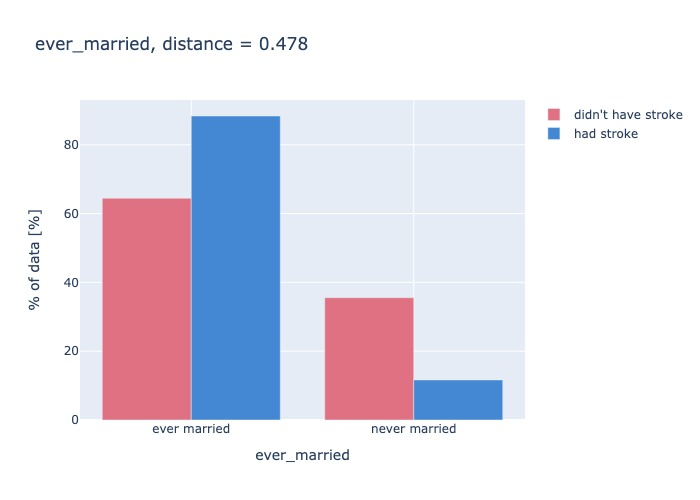

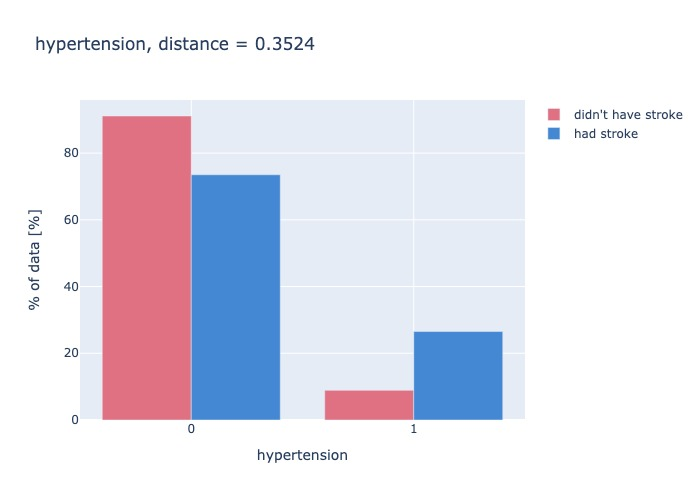

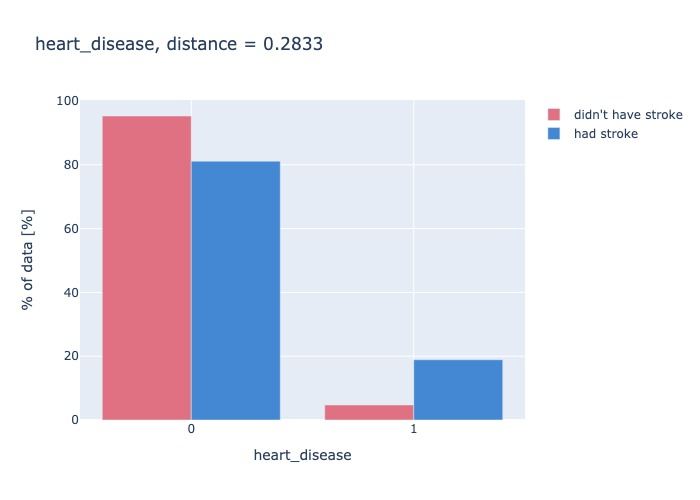

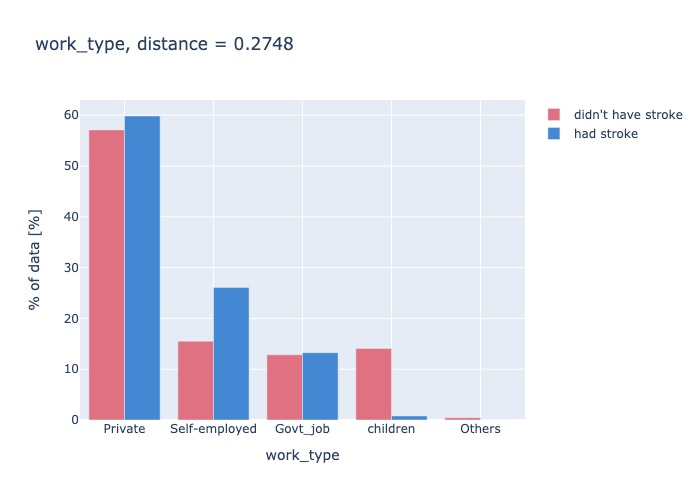

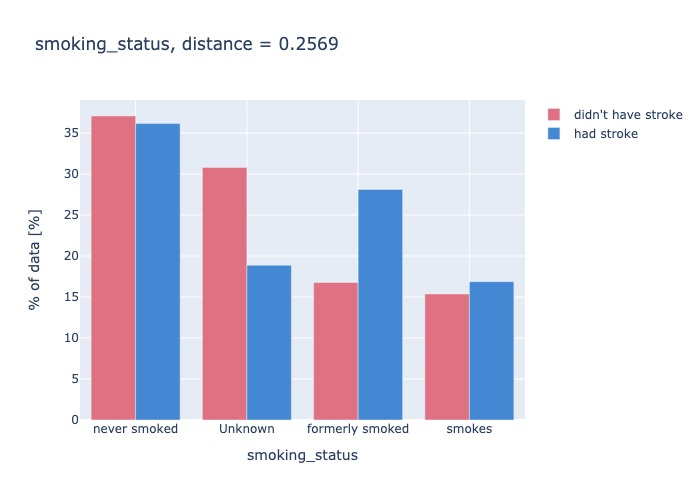

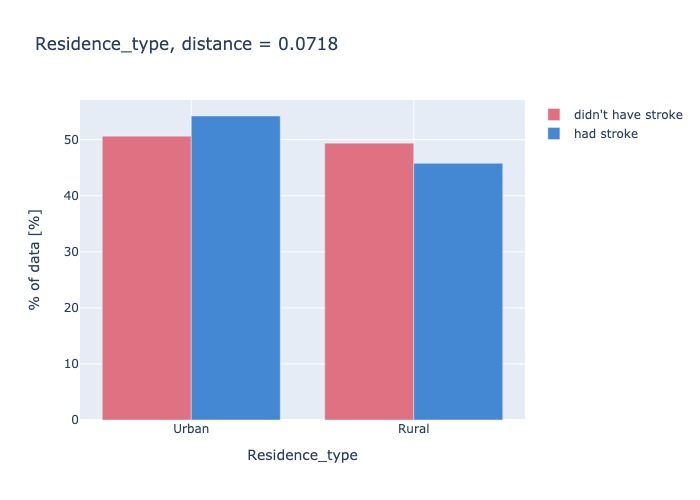

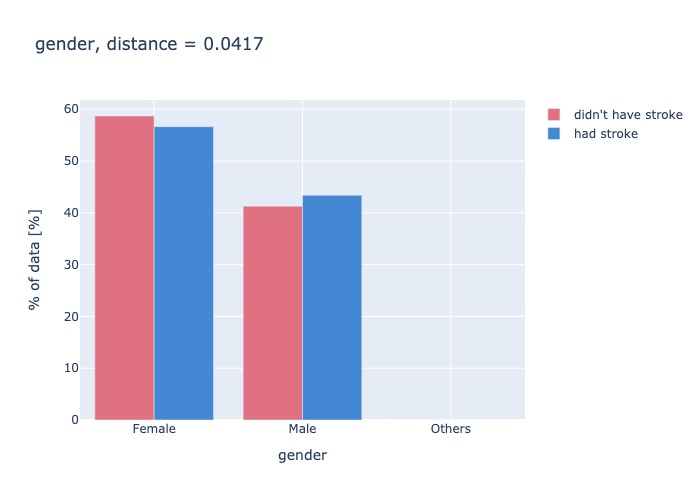

In [7]:
fig_dict, distances = compare_categorical_features(data_dict, categorical_feats, categories_recall_pct=0.95)
for feat, fig in fig_dict.items():
    fig.show()


In [8]:
round(distances, 2)

,distance
feature,
ever_married,0.48
hypertension,0.35
heart_disease,0.28
work_type,0.27
smoking_status,0.26
Residence_type,0.07
gender,0.04


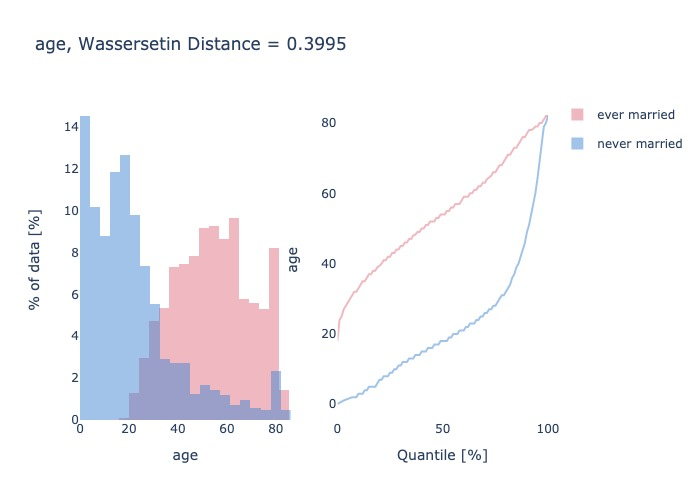

In [9]:
data_dict = {name: df for name, df  in data.groupby('ever_married')}

fig_dict, distances = compare_numerical_features(
    data_dict, ['age'], nbins=20, plot_inv_cdf=True, showgrid=False
)
for feat, fig in fig_dict.items():
    fig.show()



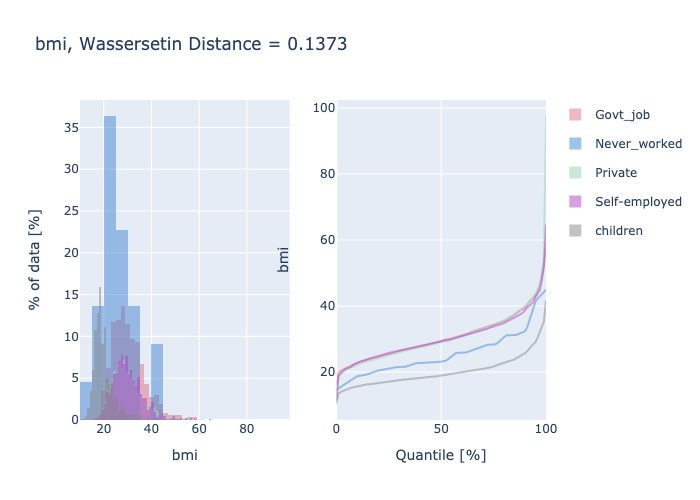

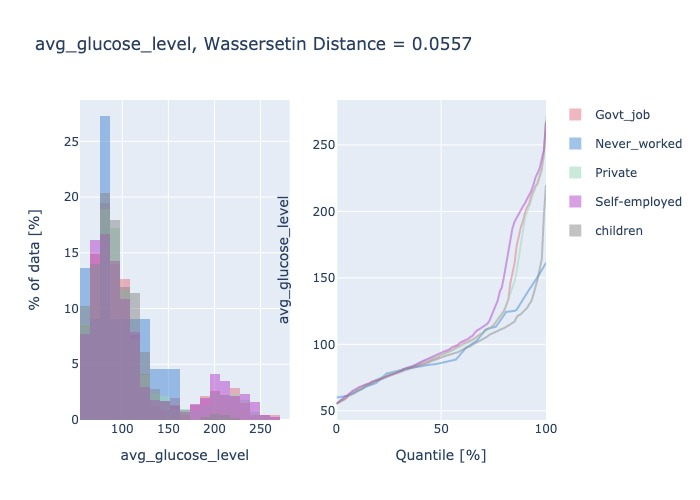

In [10]:
data_dict = {name: df for name, df  in data.groupby('work_type')}

fig_dict, distances = compare_numerical_features(data_dict, ['avg_glucose_level', 'bmi'], nbins=20, plot_inv_cdf=True)
for feat, fig in fig_dict.items():
    fig.show()

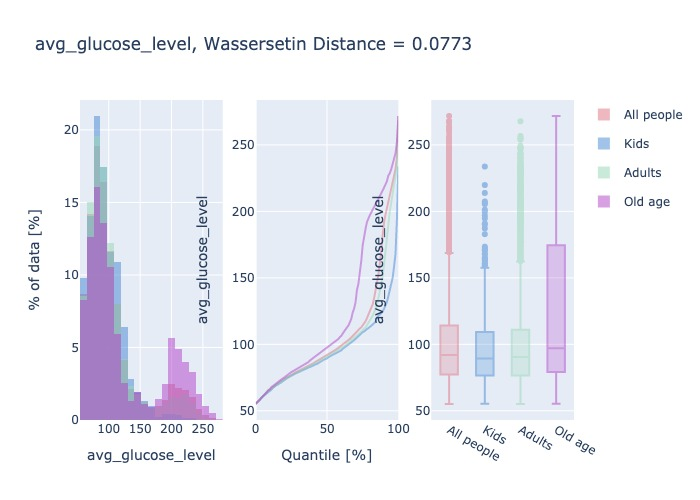

In [11]:
data_dict = {
    'All people': data,
    'Kids'      : data.query('age <= 18'),
    'Adults'    : data.query('18 < age < 60'),
    'Old age'   : data.query('60 <= age'),
}

fig_dict, distances = compare_numerical_features(
    data_dict, ['avg_glucose_level'], nbins=20, plot_inv_cdf=True, plot_box=True)
for feat, fig in fig_dict.items():
    fig.show()

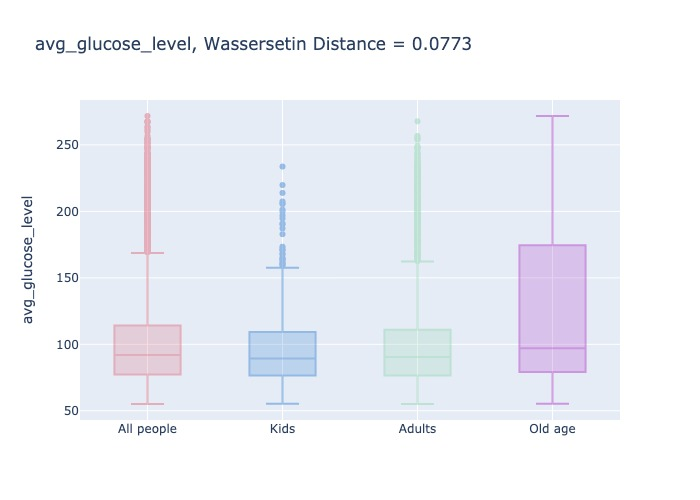

In [12]:
data_dict = {
    'All people': data,
    'Kids'      : data.query('age <= 18'),
    'Adults'    : data.query('18 < age < 60'),
    'Old age'   : data.query('60 <= age'),
}

fig_dict, distances = compare_numerical_features(data_dict, ['avg_glucose_level'], nbins=20, plot_box=True, plot_hist=False)
for feat, fig in fig_dict.items():
    fig.show()

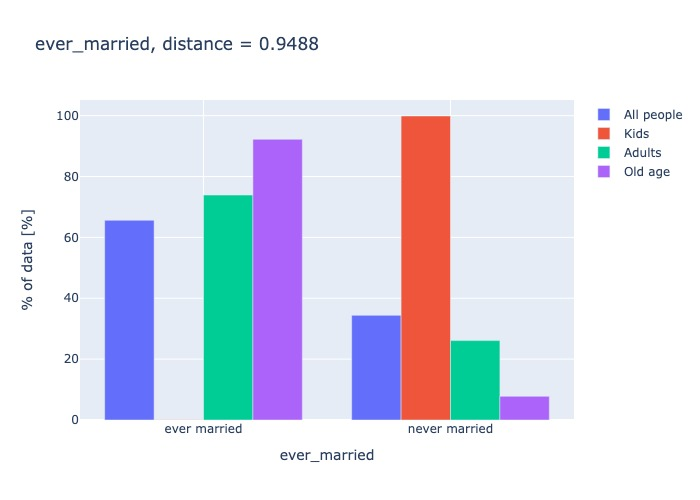

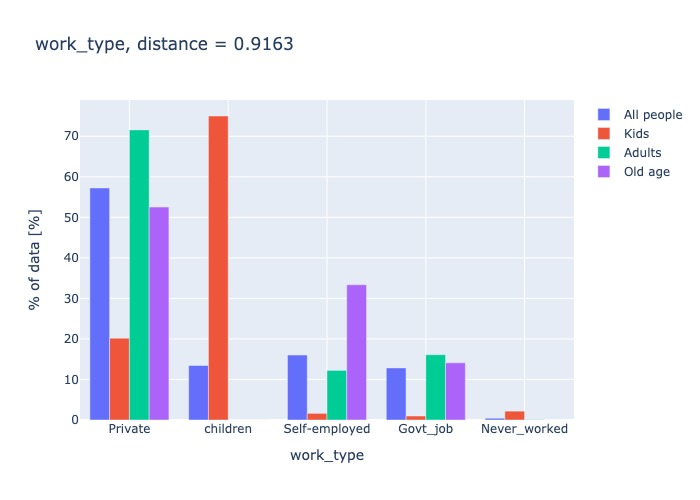

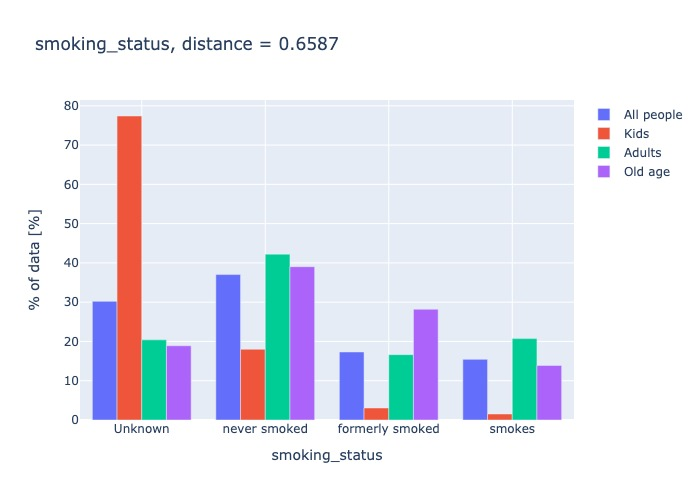

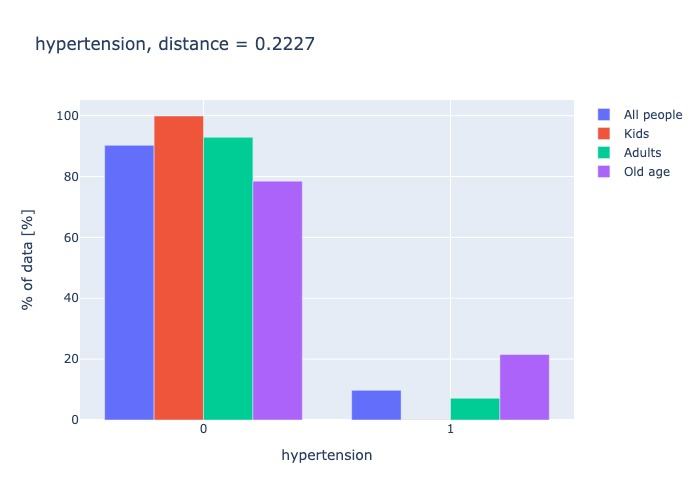

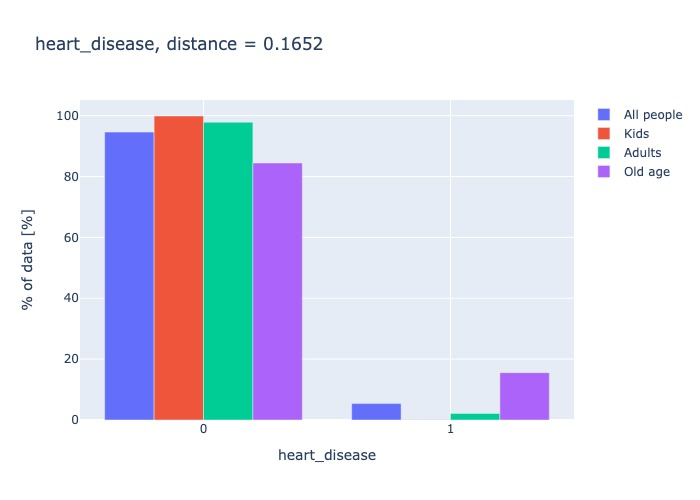

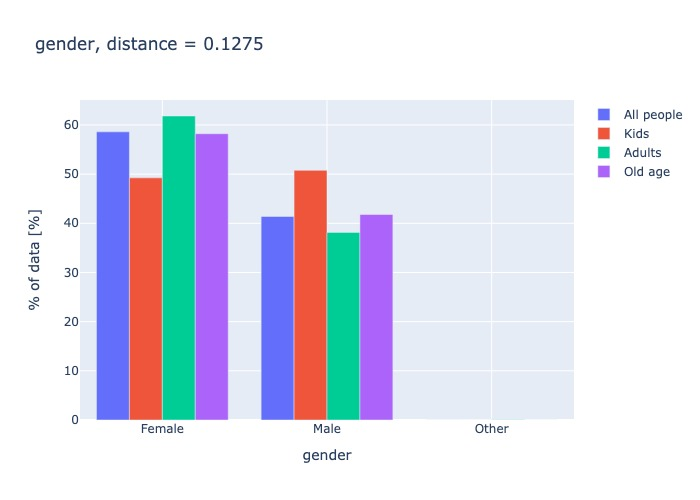

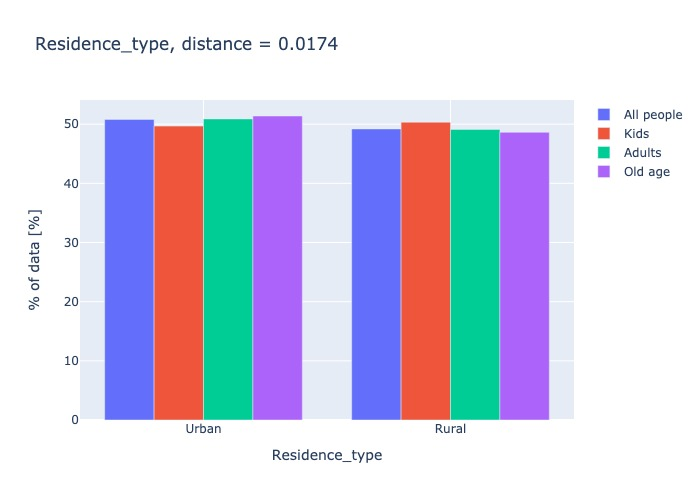

In [13]:
fig_dict, distances = compare_categorical_features(data_dict, categorical_feats, color_cycle=px.colors.qualitative.Plotly)
for feat, fig in fig_dict.items():
    fig.show()

In [14]:
distances

,distance
feature,
ever_married,0.948817
work_type,0.916265
smoking_status,0.658703
hypertension,0.222734
heart_disease,0.165220
gender,0.127494
Residence_type,0.017366


# Marginal dependence plots

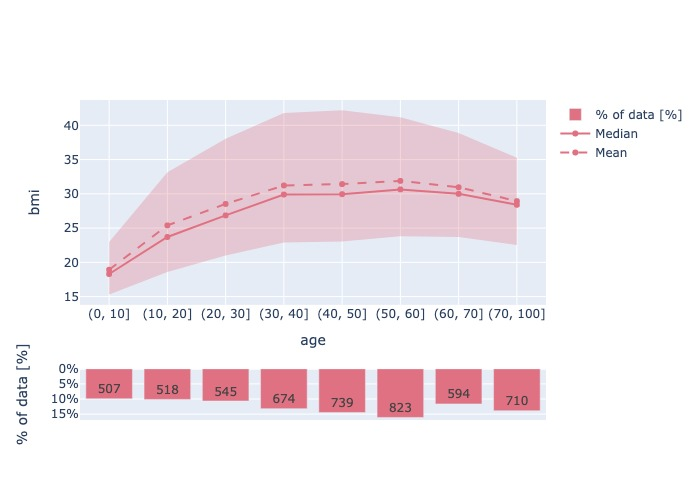

In [15]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 100]
fig = marginal_dependency_plot(
    data, target='bmi', feature='age', bins=bins,quantiles=(0.1, 0.9),
    categorical_feature=False, show_histogram=True
)
fig#.show()

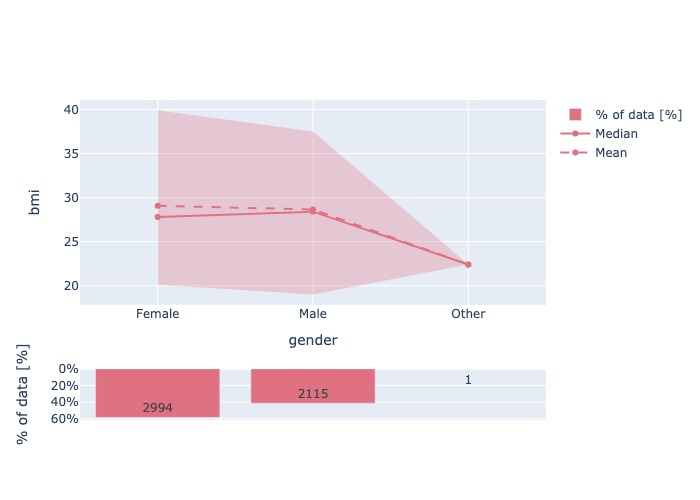

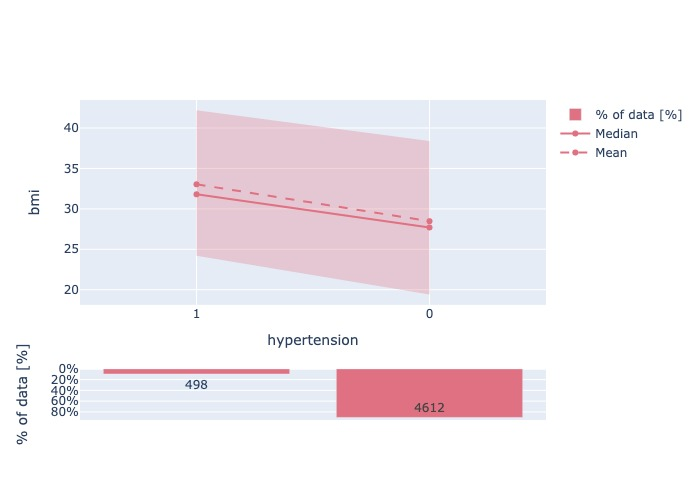

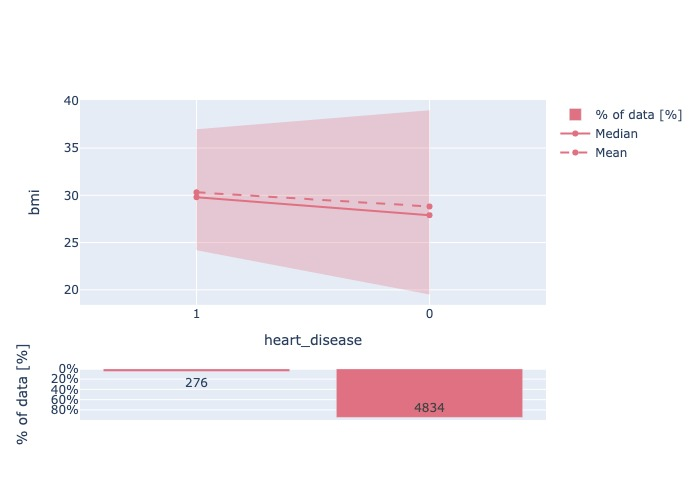

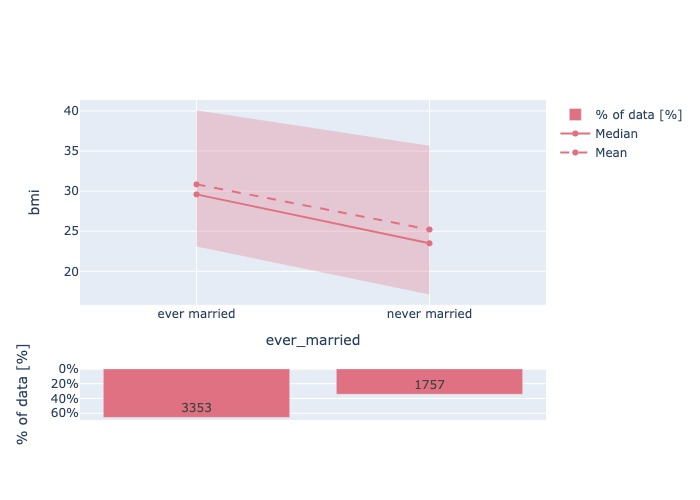

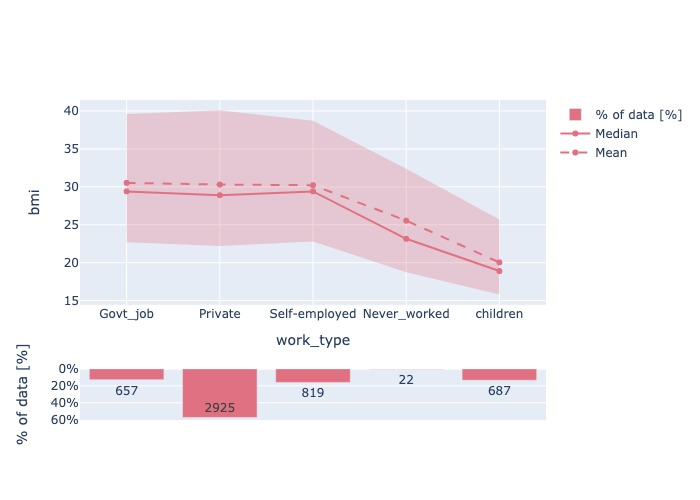

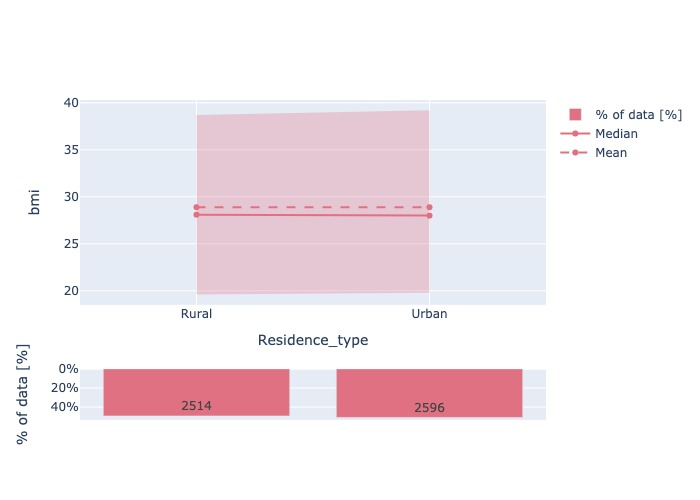

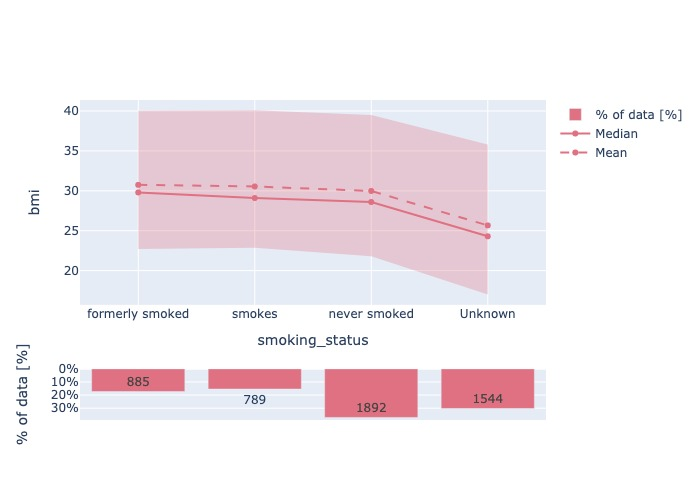

In [16]:
for cat_feat in categorical_feats:
    fig = marginal_dependency_plot(
        data, target='bmi', feature=cat_feat, categorical_feature=True
    )
    fig.show()

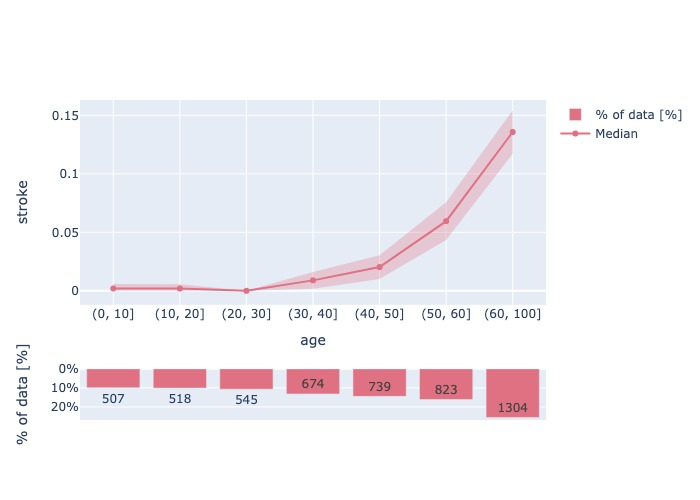

In [17]:
target_class = "had stroke"
alpha = 0.05

bins = [0, 10, 20, 30, 40, 50, 60, 100]
fig = marginal_dependency_plot(
    data, target='stroke', 
    feature='age', categorical_feature=False, 
    categorical_target_class=target_class, 
    bins=bins, confidence_alpha=0.05
)
fig.show()

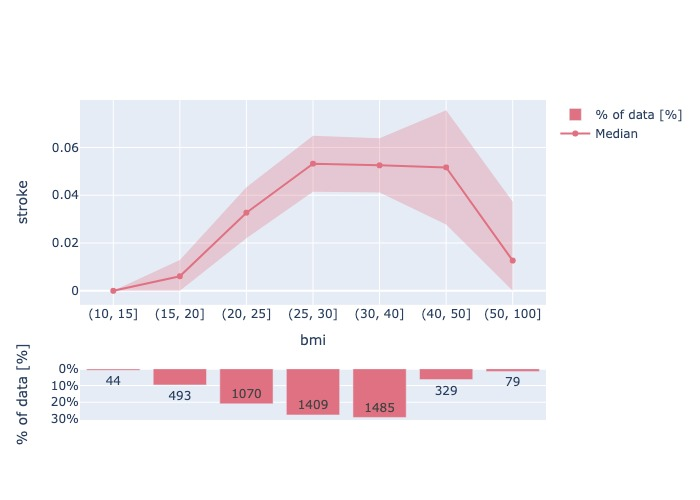

In [18]:
bins = [10, 15, 20, 25,  30, 40, 50, 100]

fig = marginal_dependency_plot(
    data, target='stroke', 
    feature='bmi', categorical_feature=False, 
    categorical_target_class=target_class, 
    bins=bins, confidence_alpha=0.05
)
fig.show()

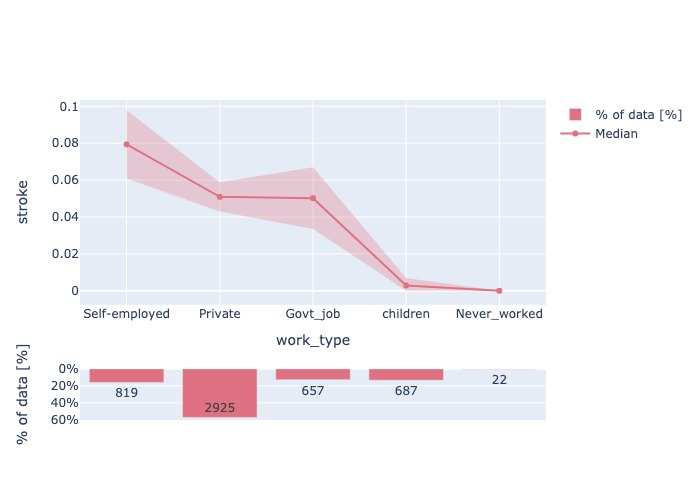

In [19]:

fig = marginal_dependency_plot(
    data, target='stroke', 
    feature='work_type', categorical_feature=True, 
    categorical_target_class=target_class, 
    bins=bins, confidence_alpha=0.05
)
fig.show()